## Stats507 Homework5, Winter 2019
### Shuoran Li
#### shuoranl@umich.edu

I did not discuss problems with anyone else in the class on this homework.

Problem 1 took me 1.5 hours; Problem 2 took me 3 hours; Problem 3 took me 3 hours

In [340]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
import scipy.stats
from scipy.stats import chi2
import copy
from matplotlib import animation
import time
from IPython.display import display,clear_output

### Problem 1: Warmup: Around the Semicircular Law

### 1.1 
#### Define a function wigner_density that takes a single number (integer or float) as its input and returns a float as its output, given by the value of the semicircular density evaluated at the input.

In [341]:
def wigner_density(x):
    if abs(x) > 2:
        return 0
    else:
        return(np.sqrt(4-x**2)/(2*np.pi))

### 1.2
#### Define a function generate_wigner that takes a single positive integer n as its argument and returns a random n-by-n Wigner matrix.

In [342]:
def generate_wigner(n):
    if not isinstance(n, (int, np.int64, np.int32)):
        raise TypeError('Input number should be int!')
    elif n<= 0:
        raise ValueError('Input number should be positive!')
    else:    
        rawMat = np.matrix(1/np.sqrt(n)*np.random.randn(n,n))
        upperMat = np.triu(rawMat) # Get the upper part of the matrix
        lowerMat = np.tril(rawMat.transpose(),k=-1) # Get the lower part of the transposed matrix
        symMat = upperMat + lowerMat
        return(symMat)

In [343]:
generate_wigner(3)

array([[-0.09078721,  0.52386879, -0.2094328 ],
       [ 0.52386879, -0.26596926, -0.26810396],
       [-0.2094328 , -0.26810396,  0.71420425]])

### 1.3
#### Write a function get_spectrum that takes a numpy matrix or 2-dimensional numpy array and re- turns a numpy array of its eigenvalues in non-decreasing order.

In [344]:
def get_spectrum(mat):
    va,ve = np.linalg.eigh(mat)
    return(va)

### 1.4
#### Create a plot with four subplots, arranged vertically, each showing a (normalized) histogram, in blue, of the eigenvalues of a random n-by-n Wigner matrix for n = 100, 200, 500 and 1000.

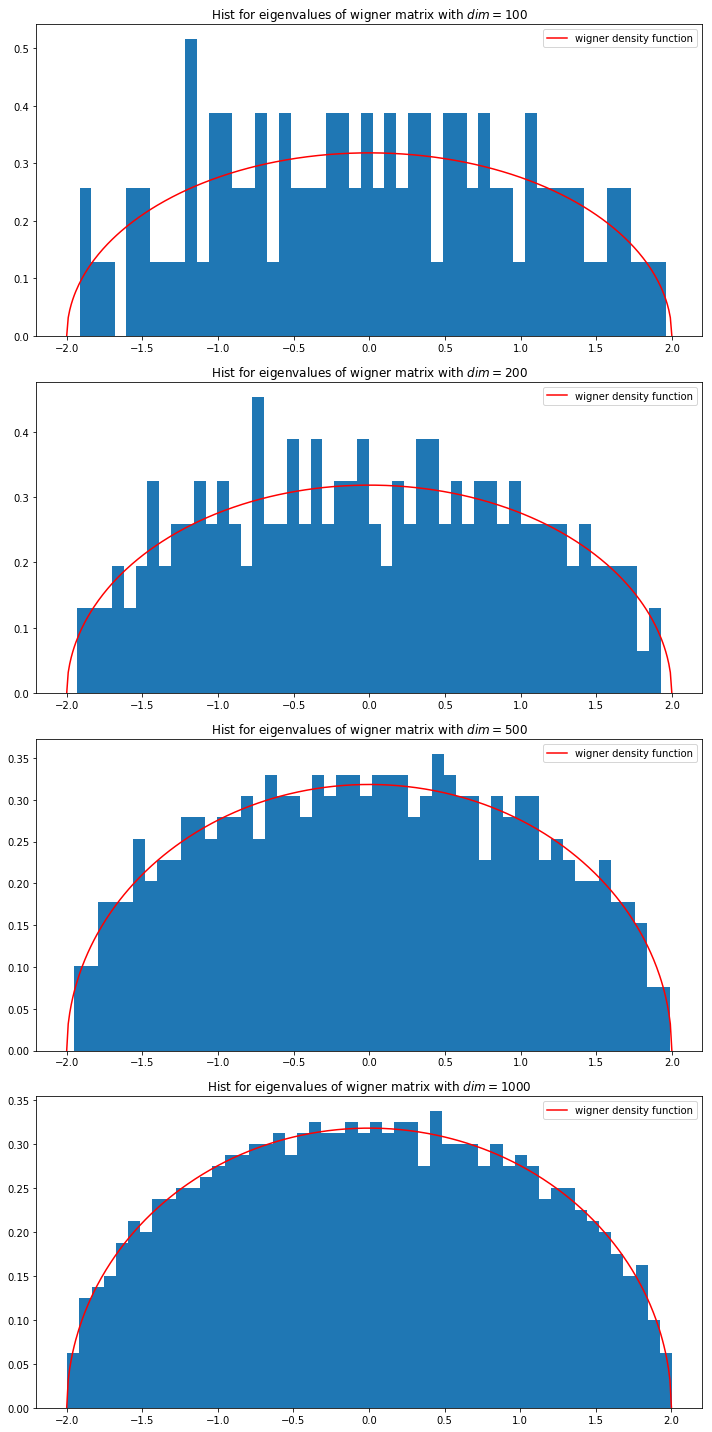

In [345]:
plt.figure(figsize=(10,20))
# plot for n = 100
plt.subplot(411)
x = get_spectrum(generate_wigner(100))
plt.hist(x,50,density = 1)
t = np.arange(-2,2.01,0.01)
y = list(map(wigner_density, t))
plt.plot(t,y,'-r', label = 'wigner density function')
plt.legend(loc = 'best')
plt.title('Hist for eigenvalues of wigner matrix with $dim = 100$')
# plot for n = 200
plt.subplot(412)
x = get_spectrum(generate_wigner(200))
plt.hist(x,50,density = 1)
plt.plot(t,y,'-r', label = 'wigner density function')
plt.legend(loc = 'best')
plt.title('Hist for eigenvalues of wigner matrix with $dim = 200$')
# plot for n = 500
plt.subplot(413)
x = get_spectrum(generate_wigner(500))
plt.hist(x,50,density = 1)
plt.plot(t,y,'-r', label = 'wigner density function')
plt.legend(loc = 'best')
plt.title('Hist for eigenvalues of wigner matrix with $dim = 500$')
# plot for n = 1000
plt.subplot(414)
x = get_spectrum(generate_wigner(1000))
plt.hist(x,50,density = 1)
plt.plot(t,y,'-r', label = 'wigner density function')
plt.legend(loc = 'best')
plt.title('Hist for eigenvalues of wigner matrix with $dim = 1000$')
_ = plt.tight_layout()

## When n = 1000, semicircular law appears to be a good fit.

### Problem 2: Plotting a Mixture of Normals

### 2.1
#### Load files

In [346]:
points = np.loadtxt("./points.dlm")
labels = np.load("./labels.npy")

### 2.2
#### Generate a scatter plot of the data.

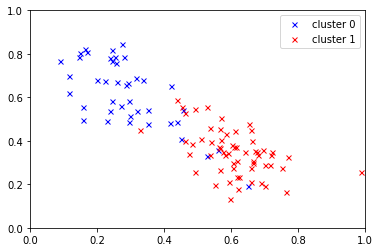

In [347]:
index_0 = [i for i in range(len(labels)) if labels[i]==0]
index_1 = [i for i in range(len(labels)) if labels[i]==1]
plt.plot(points[index_0,0],points[index_0,1],'xb',markersize = 5, label = 'cluster 0')
plt.plot(points[index_1,0],points[index_1,1],'xr',markersize = 5, label = 'cluster 1')
plt.ylim(0,1)
plt.xlim(0,1)
_ = plt.legend(loc='best')

### 2.3
#### Add contour

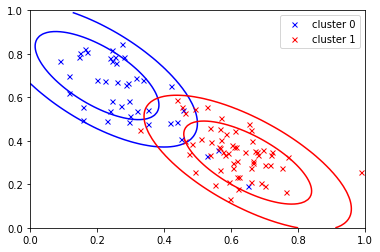

In [348]:
index_0 = [i for i in range(len(labels)) if labels[i]==0]
index_1 = [i for i in range(len(labels)) if labels[i]==1]

mu0 = np.array([0.2,0.7]) 
mu1 = np.array([0.65,0.3])

cov0 = np.array([[0.015,-0.011],[-0.011,0.018]])
cov1 = np.array([[0.016,-0.011],[-0.011,0.016]])
mvn0 = scipy.stats.multivariate_normal(mu0,cov0)
mvn1 = scipy.stats.multivariate_normal(mu1,cov1)

# scatter plot
plt.plot(points[index_0,0],points[index_0,1],'xb',markersize = 5, label = 'cluster 0')
plt.plot(points[index_1,0],points[index_1,1],'xr',markersize = 5, label = 'cluster 1')
plt.ylim(0,1)
plt.xlim(0,1)
_ = plt.legend(loc='best')
# contour
x,y = np.mgrid[0:1:0.01,0:1:0.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
level0_68 = np.exp(-0.5*chi2.ppf(0.68,2))/(2*np.pi)*np.linalg.det(cov0)**(-0.5)
level0_95 = np.exp(-0.5*chi2.ppf(0.95,2))/(2*np.pi)*np.linalg.det(cov0)**(-0.5)
level1_68 = np.exp(-0.5*chi2.ppf(0.68,2))/(2*np.pi)*np.linalg.det(cov1)**(-0.5)
level1_95 = np.exp(-0.5*chi2.ppf(0.95,2))/(2*np.pi)*np.linalg.det(cov1)**(-0.5)
_ = plt.contour(x, y, mvn0.pdf(pos),levels = [level0_95,level0_68],colors = "blue")
_ = plt.contour(x, y, mvn1.pdf(pos),levels = [level1_95,level1_68],colors = "red")

### 2.4
#### Add annotation for outliers

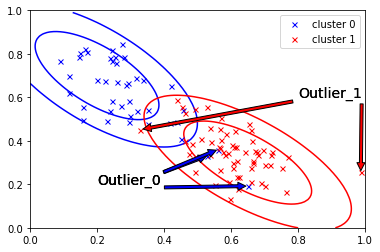

In [349]:
index_0 = [i for i in range(len(labels)) if labels[i]==0]
index_1 = [i for i in range(len(labels)) if labels[i]==1]

mu0 = np.array([0.2,0.7]) 
mu1 = np.array([0.65,0.3])

cov0 = np.array([[0.015,-0.011],[-0.011,0.018]])
cov1 = np.array([[0.016,-0.011],[-0.011,0.016]])
mvn0 = scipy.stats.multivariate_normal(mu0,cov0)
mvn1 = scipy.stats.multivariate_normal(mu1,cov1)

# scatter plot
plt.plot(points[index_0,0],points[index_0,1],'xb',markersize = 5, label = 'cluster 0')
plt.plot(points[index_1,0],points[index_1,1],'xr',markersize = 5, label = 'cluster 1')
plt.ylim(0,1)
plt.xlim(0,1)
_ = plt.legend(loc='best')
# contour
x,y = np.mgrid[0:1:0.01,0:1:0.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
level0_68 = np.exp(-0.5*chi2.ppf(0.68,2))/(2*np.pi)*np.linalg.det(cov0)**(-0.5)
level0_95 = np.exp(-0.5*chi2.ppf(0.95,2))/(2*np.pi)*np.linalg.det(cov0)**(-0.5)
level1_68 = np.exp(-0.5*chi2.ppf(0.68,2))/(2*np.pi)*np.linalg.det(cov1)**(-0.5)
level1_95 = np.exp(-0.5*chi2.ppf(0.95,2))/(2*np.pi)*np.linalg.det(cov1)**(-0.5)
_ = plt.contour(x, y, mvn0.pdf(pos),levels = [level0_95,level0_68],colors = "blue")
_ = plt.contour(x, y, mvn1.pdf(pos),levels = [level1_95,level1_68],colors = "red")

outlier_0 = [i for i in index_0 if mvn0.pdf(np.array([points[i,:]]))<level0_95]
outlier_1 = [i for i in index_1 if mvn1.pdf(np.array([points[i,:]]))<level1_95]

for i in range(len(outlier_0)):
    _ = plt.annotate('Outlier_0',xy = (points[outlier_0[i],:]),xytext = (0.2,0.2),fontsize = 14, 
                     arrowprops=dict(facecolor = 'blue', shrink = 0.02, width = 3, headwidth = 8,headlength = 8))
for i in range(len(outlier_1)):
    _ = plt.annotate('Outlier_1',xy = (points[outlier_1[i],:]),xytext = (0.8,0.6),fontsize = 14, 
                     arrowprops=dict(facecolor = 'red', shrink = 0.02, width = 3, headwidth = 8,headlength = 8))

### Problem 3: Conway’s Game of Life

### 3.1
#### Write a function is_valid_board that takes an m-by-n numpy array (i.e., an ndarray) as its only argument and returns a Python Boolean that is True if and only if the argument is a valid representation of a Game of Life board.

In [350]:
def is_valid_board(M):
    if not isinstance(M,np.ndarray):
        raise TypeError('Input should be a numpy array!')
    else:
        bool_M = np.any([M == 1,M == 0],axis = 0)
        return np.all(bool_M)

### 3.2
####  Write a function called gol_step that takes an m-by-n numpy array as its argument and returns another numpy array of the same size (i.e., also m-by-n), corresponding to the board at the next step of the game.

In [351]:
def gol_step(M):
    if not is_valid_board(M):
        raise TypeError('Input should be a valid Game of Life board!')
    else:
        nrow = M.shape[0]
        ncol = M.shape[1]
        M_next = copy.copy(M)
        for i in range(nrow):
            for j in range(ncol):
                score = sum((M[(i-1)%nrow,(j-1)%ncol],M[(i-1)%nrow,j],
                             M[(i-1)%nrow,(j+1)%ncol],M[i,(j-1)%ncol],
                             M[i,(j+1)%ncol],M[(i+1)%nrow,(j-1)%ncol],
                             M[(i+1)%nrow,j],M[(i+1)%nrow,(j+1)%ncol]))
                if score == 3:
                    M_next[i,j] = 1
                elif score != 2:
                    M_next[i,j] = 0
    return(M_next)                   

### 3.3
#### Write a function called draw_gol_board that takes an m-by-n numpy array (i.e., an ndarray) as its only argument and draws the board as an m-by-n set of tiles, colored black or white correspond to whether the corresponding cell is alive or dead, respectively.

In [352]:
def draw_gol_board(M):
    plt.imshow(M, cmap=plt.get_cmap('binary'))
    plt.xticks([])
    plt.yticks([])

### 3.4
####  Create a 20-by-20 numpy array corresponding to a Game of Life board in which all cells are dead, with the exception that the top-left 5-by-5 section of the board looks like this:

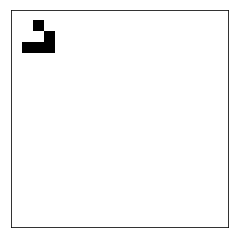

In [353]:
game_board = np.zeros([20,20])
game_board[0:5,0:5] = np.array([[0,0,0,0,0],[0,0,1,0,0],[0,0,0,1,0],[0,1,1,1,0],[0,0,0,0,0]])
draw_gol_board(game_board)

### 3.5
#### Generate a plot with 5 subplots, arranged in a 5-by-1 grid, showing the first five steps of the Game of Life when started with the board you just created, with the steps ordered from top to bottom, The figure in the 5-by-5 sub-board above is called a glider, and it is interesting in that, as you can see from your plot, it seems to move along the board as you run the game.

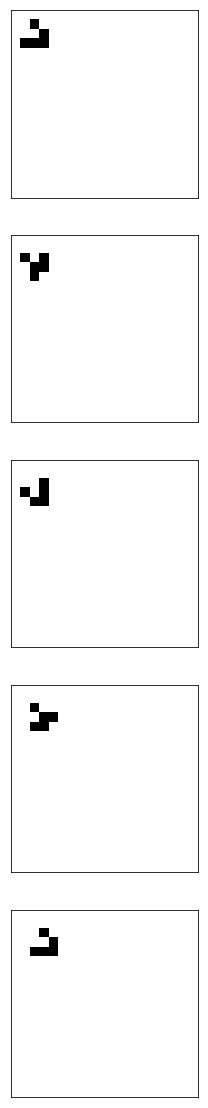

In [354]:
plt.figure(figsize=(10,20))
plt.subplot(511)
draw_gol_board(game_board)

plt.subplot(512)
board_2 = gol_step(game_board)
draw_gol_board(board_2)

plt.subplot(513)
board_3 = gol_step(board_2)
draw_gol_board(board_3)

plt.subplot(514)
board_4 = gol_step(board_3)
draw_gol_board(board_4)

plt.subplot(515)
board_5 = gol_step(board_4)
draw_gol_board(board_5)

#### OPTIONAL

In [355]:
def draw_animation(M,n): 
    for i in range(n):
        M = gol_step(M)
        draw_gol_board(M)
        plt.show()
        time.sleep(1)
        clear_output(wait=True)

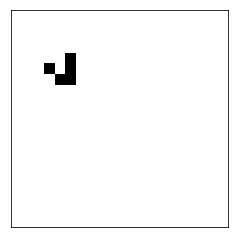

In [357]:
draw_animation(game_board,10)